# Module 9: Big Data Architecture Part 1

# Introduction

Data architects play an important role in designing software and shaping industry standards. This module provides you with an introduction to big data architecture and the issues data architects face in today’s business landscape.

This module consists of 2 parts:

- **Part 1** - Kafka and the SMACK Stack
- **Part 2** - Data Warehouses, Lakehouses and Securing Data

Each part is provided in a separate notebook file. It is recommended that you follow the order of the notebooks.

# Learning Outcomes  

By the end of this module, learners will be able to:

* Define IT architecture
* Compare and contrast popular big data architectures 
* Identify the key components of the SMACK (Spark, Mesos, Akka, Cassandra, Kafka) stack

# Readings and Resources

We invite you to further supplement this notebook with the following recommended texts/resources:

- Kleppmann, M. (2017). Chapter 12: The Future of Data Systems in *Designing Data Intensive Applications*. O’Reilly: Boston. http://shop.oreilly.com/product/0636920032175.do  

<h1>Table of Contents<span class="tocSkip"></span></h1>
<br>
<div class="toc">
<ul class="toc-item">
<li><span><a href="#Module-9:-Big-Data-Architecture-Part-1" data-toc-modified-id="Module-9:-Big-Data-Architecture-Part-1">Module 9: Big Data Architecture Part 1</a></span>
</li>
<li><span><a href="#Introduction" data-toc-modified-id="Introduction">Introduction</a></span>
</li>
<li><span><a href="#Learning-Outcomes" data-toc-modified-id="Learning-Outcomes">Learning Outcomes</a></span>
</li>
<li><span><a href="#Readings-and-Resources" data-toc-modified-id="Readings-and-Resources">Readings and Resources</a></span>
</li>
<li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents">Table of Contents</a></span>
</li>
<li><span><a href="#Big-Data-Architecture" data-toc-modified-id="Big-Data-Architecture">Big Data Architecture</a></span>
</li>
<li><span><a href="#Kafka" data-toc-modified-id="Kafka">Kafka</a></span>
<ul class="toc-item">
<li><span><a href="#Kafka-use-cases" data-toc-modified-id="Kafka-use-cases">Kafka use cases</a></span>
</li>
</ul>
</li>
<li><span><a href="#The-Netflix-Data-Pipeline" data-toc-modified-id="The-Netflix-Data-Pipeline">The Netflix Data Pipeline</a></span>
<ul class="toc-item">
<li><span><a href="#Netflix-Data-Pipeline-V1.0" data-toc-modified-id="Netflix-Data-Pipeline-V1.0">Netflix Data Pipeline V1.0</a></span>
</li>
<li><span><a href="#Netflix-Data-Pipeline-V2.0-(2015)" data-toc-modified-id="Netflix-Data-Pipeline-V2.0-(2015)">Netflix Data Pipeline V2.0 (2015)</a></span>
</li>
</ul>
</li>
<li><span><a href="#The-SMACK-Stack" data-toc-modified-id="The-SMACK-Stack">The SMACK Stack</a></span>
<ul class="toc-item">
<li><span><a href="#Infrastructure-and-Data-in-the-Cloud" data-toc-modified-id="Infrastructure-and-Data-in-the-Cloud">Infrastructure and Data in the Cloud</a></span>
</li>
<li><span><a href="#Serverless-Architecture" data-toc-modified-id="Serverless-Architecture">Serverless Architecture</a></span>
</li>
<li><span><a href="#DC/OS-and-Mesos" data-toc-modified-id="DC/OS-and-Mesos">DC/OS and Mesos</a></span>
<ul class="toc-item">
<li><span><a href="#Benefits-of-Mesos" data-toc-modified-id="Benefits-of-Mesos">Benefits of Mesos</a></span>
</li>
</ul>
</li>
<li><span><a href="#Kubernetes" data-toc-modified-id="Kubernetes">Kubernetes</a></span>
</li>
</ul>
</li>
<li><span><a href="#A-Sampling-of-Service-Discovery-&-Monitoring-Tools" data-toc-modified-id="A-Sampling-of-Service-Discovery-&-Monitoring-Tools">A Sampling of Service Discovery & Monitoring Tools</a></span>
</li>
<li><span><a href="#References" data-toc-modified-id="References">References</a></span>
</li>
</ul>
</div>

# Big Data Architecture

**IT architecture** is the art and science of choosing standards and preferred software products for an organization and the high-level design of how they will interact. It is often an enterprise-wide activity and is concerned with the "big picture" &mdash; not the details of the internal design of systems (other than setting standards and guidelines to be followed). **Big data architecture** is concerned with selecting and implementing the proper data collection, storage, distribution, and management tools necessary for a reliable, performant IT platform for a data-driven organization.

In this notebook, we will look at some popular components of modern corporate-level big data messaging pipelines.

# Kafka

Kafka is a distributed publish-subscribe messaging system. Recall that instead of connecting applications directly to the data sources of data (also known as producers or publishers), we can introduce a broker that receives and distributes messages to their receivers (also known as consumers or subscribers). This decouples producers and consumers of data so both can be added or removed more easily.

Kafka's lead creator, Jay Kreps, named it Kafka (after the novelist Franz Kafka) because it is designed for systems that do a lot of writing (he studied Kafka in school). Kafka was open sourced in 2010.

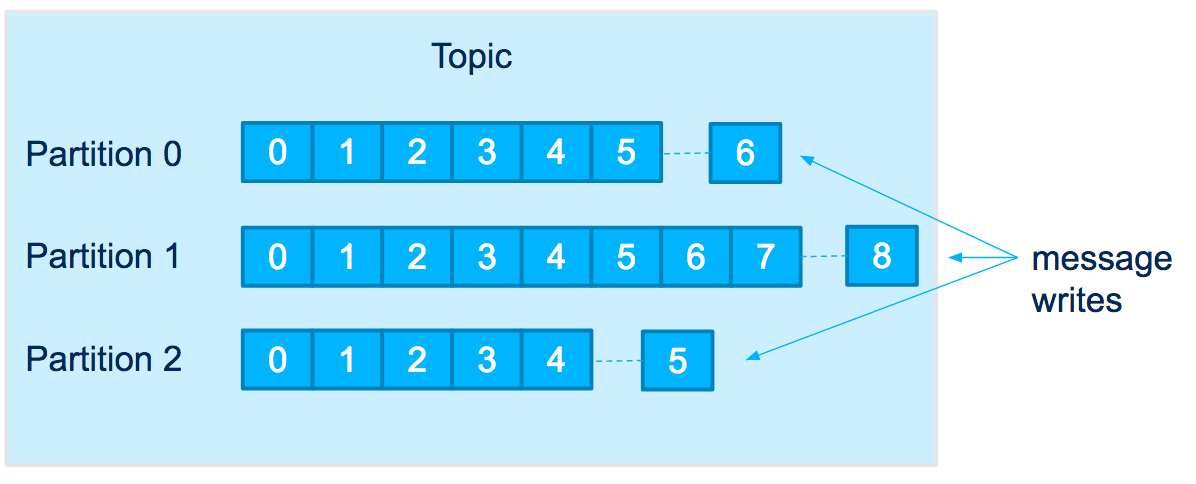

Kafka has become one of the most popular tools for capturing high-velocity streaming data and buffering it so it isn't lost if the incoming data rate is temporarily greater than the consumers can handle. The data accumulates in Kafka until a quieter time when the consumers are able to catch up. It is now a key component of the big data architecture of a large number of major businesses.

The unit of data in Kafka is a **message**: an arbitrary array of bytes with an optional bit of metadata called a key (also a byte array, which has no meaning to Kafka). Messages are published by producers, categorized into topics, and pulled for processing by consumers. Consumers subscribe to topics they want to read messages from. You can think of it like a distributed commit log if you're familiar with the concept. Data is stored durably by Kafka, in time order, and can be read deterministically.

Keys can be used for partitioning. Messages are written into Kafka using batches for efficiency (remember that Spark Streaming also uses this trick). Larger batches are more efficient but introduce a delay until the message is available to consumers.

Messages can have any structure, but [Apache Avro](https://avro.apache.org/) is becoming increasingly popular. Recall Avro is compact &mdash; it has a schema that is not sent with every message (so it doesn't require code generation if the schema changes), strong typing and schema evolution, and both forward and backward compatibility. By using well-defined schemas and storing them in a common repository, the messages can be understood without coordination.

Kafka maintains a partitioned log for each topic. Each partition is an ordered subset of the messages published to a topic. Partitions of the same topic can be spread across many nodes in a cluster and are usually replicated for reliability.

> **NOTE**: Each partition is ordered but not across partitions &mdash; if data is split across partitions there is no guarantee that messages will be time-ordered across an entire topic. We usually think of a stream as being a topic (including all of its partitions).

Depending on the hardware, a single Kafka broker (single server) can handle thousands of partitions and millions of messages per second.

Each topic can have a different expiry (i.e. how long the data is retained). Expiry can be determined based on a certain length of time or until the topic reaches a certain size.

LinkedIn currently uses Kafka for billions of messages (totalling around a petabyte in size) per day and has processed over a trillion messages to date.

## Kafka use cases

Here's a high-level view of the various uses of the Kafka system.

- **Messaging**: Mediating communication between applications as a message broker


- **Metrics**: Aggregating statistics from distributed applications to produce centralized feeds of operational data


- **Log Aggregation**: Collection of all logs from web servers, similar to Flume. Flume documentation: https://flume.apache.org.


- **Stream Processing**: Collection, aggregation, transformation and/or publishing


- **Event Sourcing**: Storing state changes as a time-ordered sequence of records


- **Website Activity Tracking**: Kafka was originally created to rebuild a user activity tracking pipeline at LinkedIn as a set of real-time publish-subscribe feeds


- **Commit Log**: External commit log for a distributed system. The log helps replicate data between nodes and acts as a re-syncing mechanism for failed nodes to restore their data (Apache Kafka, 2019).

# The Netflix Data Pipeline

We will now turn our attention to an example: Netflix and the evolution of Netflix's data pipeline architecture. 

## Netflix Data Pipeline V1.0

Netflix had a big data problem. Netflix data engineers needed to integrate data flows from the company's rapidly growing systems. They needed a way to manage the large number of data streams that were flowing between systems and needed to be able to bring on new applications that would tie into those streams without disrupting their 24/7/365 streaming service. There were several hundred event streams flowing through Netflix that they wanted to integrate into a managed pipeline, including:

- Video viewing activities
- UI activities
- Error logs
- Performance events
- Troubleshooting & diagnostic events 

Prior to using Kafka, Netflix used tools available at the time from Amazon and the Hadoop ecosystem to create a pipeline. The architecture involved:

- Receiving data from producers using Chukwa, which is an open source data collection system for monitoring large distributed systems (documentation here: http://chukwa.apache.org).


- The data was then exported to Amazon S3, which is an object storage service provided by Amazon AWS (documentation here: https://aws.amazon.com/s3/).


- The data from S3 was read by Amazon EMR (Elastic Map-Reduce, documentation here: https://aws.amazon.com/emr/), which is a managed Hadoop framework used for analyzing data.

Netflix's Data Pipeline V1.0 processed approximately 500 billion events and 1.3 PB of data per day. It received about 8 million events and about 24 GB per second during peak hours. 

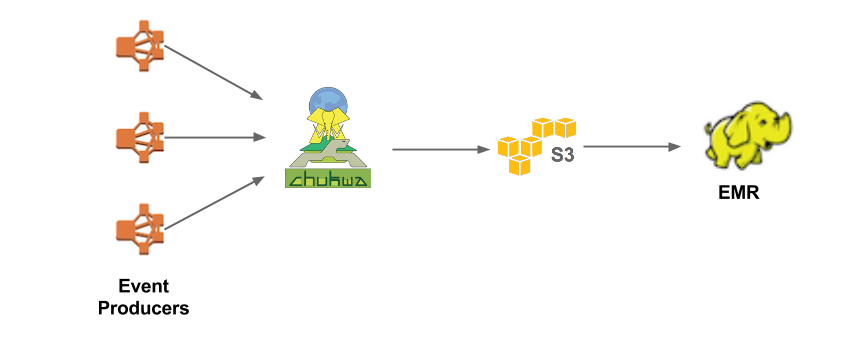

The image above shows the stepwise architecture of the Netflix Data Pipeline V1.0, as described above.

Note that operational metrics didn’t flow through this data pipeline. Netflix uses another framework called Atlas for operational insights. For more details visit https://github.com/Netflix/atlas/wiki.

**Source**: https://medium.com/netflix-techblog/evolution-of-the-netflix-data-pipeline-da246ca36905

## Netflix Data Pipeline V2.0 (2015)

In version 2, with further evolution of Kafka and its support for replication, Kafka became the front end for receiving all the events, from where all the consumers can ingest data. In the image below, ingested data is routed to various sources such as ElasticSearch along with S3 for analysis and EMR and Kafka for streaming applications.

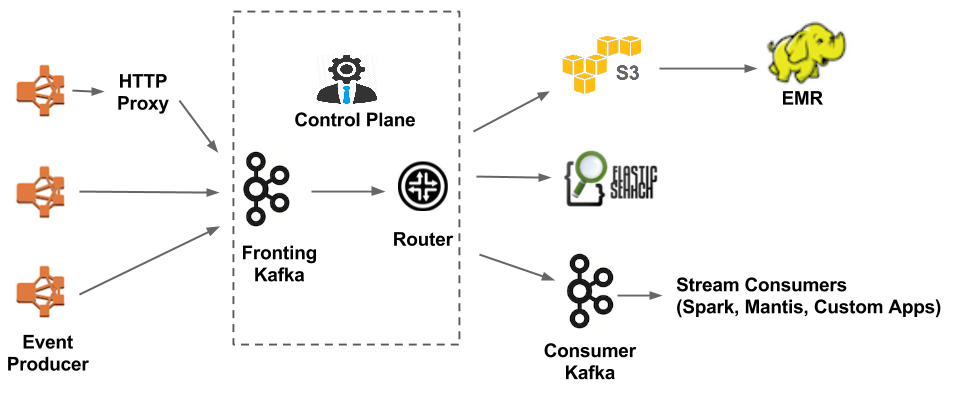

**Source**: https://medium.com/netflix-techblog/evolution-of-the-netflix-data-pipeline-da246ca36905

# The SMACK Stack

About a decade ago, the LAMP (Linux, Apache, MySQL, PHP) stack was the go-to set of technologies for creating web applications. However, the SMACK (Spark, Mesos, Akka, Cassandra, and Kafka) stack, a new architecture designed for massive scalability has become recently important. As shown in the image below, it works like this:  

1. Data is captured in real-time in a fast, replicated publish-and-subscribe queue such as Kafka.
2. A stream processor such as Spark Streaming, Samza, Storm, or Flink is used to do near realtime analytics.
3. Data is persisted using a distributed DBMS, such as Cassandra or HBase.
4. Non-blocking asynchronous applications using a concurrency framework based on Futures or Actors (e.g. Akka) can be built on top.
5. Increasingly, the entire datacenter is being virtualized using tools like Mesos, Kubernetes, or Ignite/GridGain.

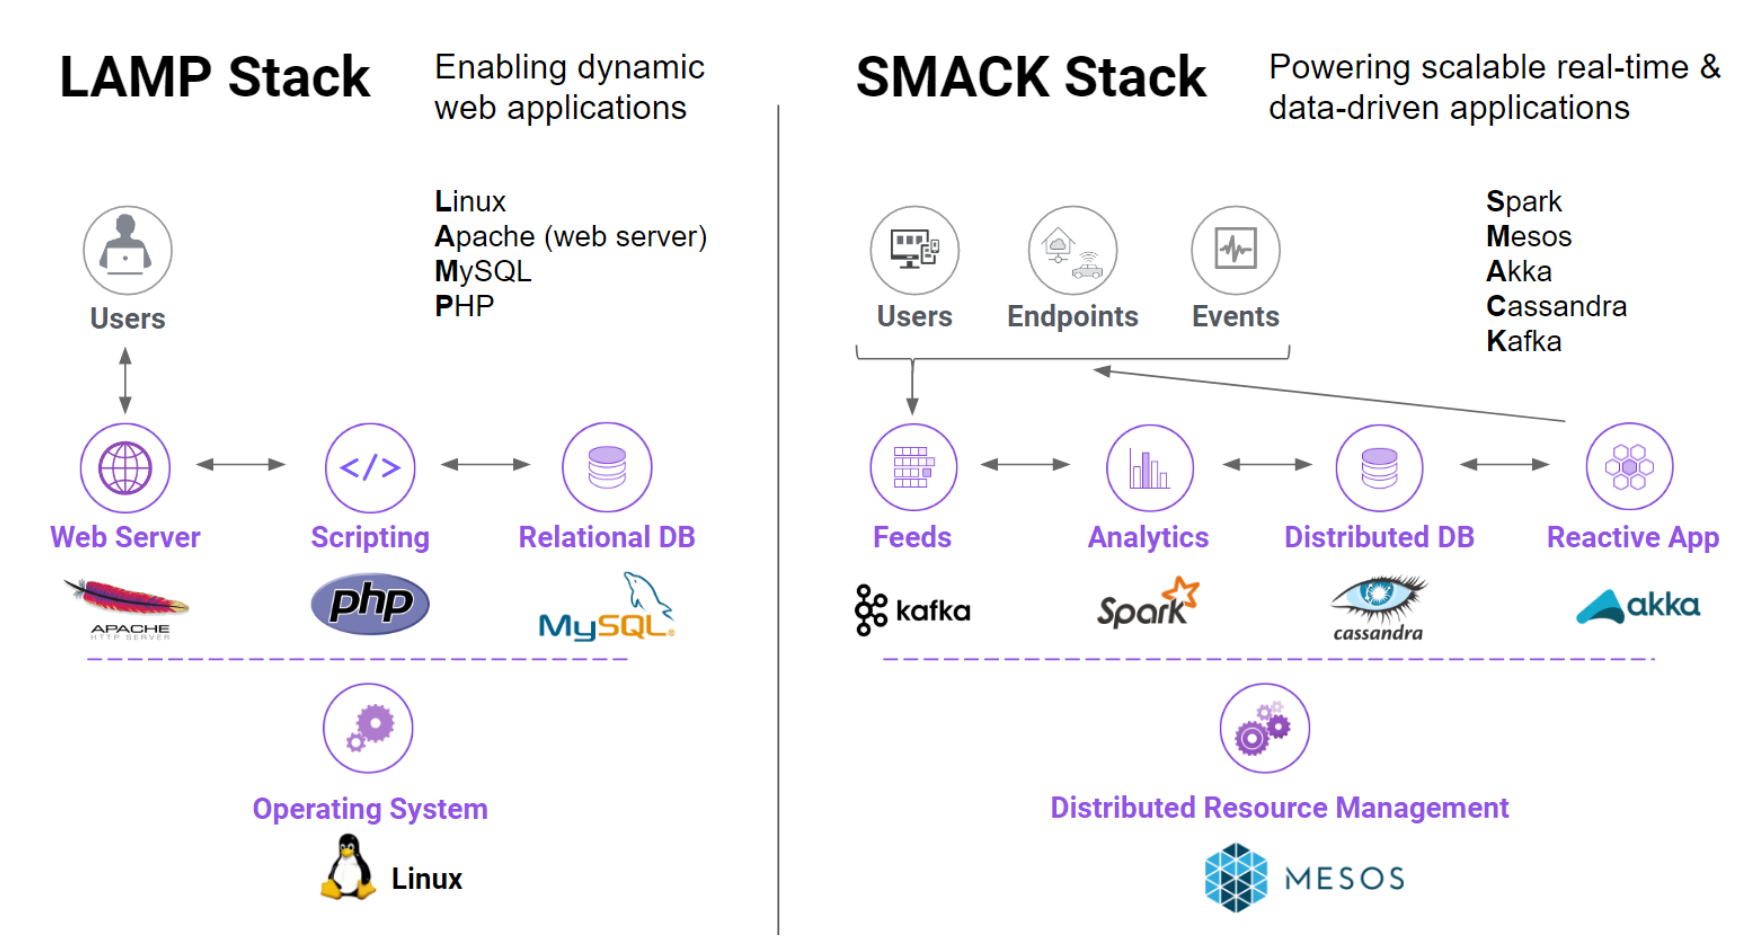

**Source**: https://mesosphere.com/wp-content/uploads/2017/06/smack-stack-is-the-new-lamp-stack-comparison.png

Note how this differs from the LAMP stack. The components are all designed to handle massive dataflows that would swamp a system built using relational technology.

## Infrastructure and Data in the Cloud

Before we look at Mesos, let's look at different strategies that organizations may implement to host their infrastructure (servers) and data. The 3 strategies are:

1. **Private clouds**: A private cloud consists of computing resources physically located in an organization's datacenter or hosted by a third-party service provider for an organization.<br><br>

2. **Public clouds**: Public clouds are cloud resources operated by a third-party service provider not restricted to a particular organization. For example, Amazon Web Services, Microsoft Azure, or Google Cloud.<br><br>

3. **Hybrid clouds**: Hybrid clouds combine one or more private and public clouds.

## Serverless Architecture

Serverless architecture is a new cloud-based alternative for running certain types of applications.

> "Serverless is the native architecture of the cloud that enables you to shift more of your operational responsibilities to AWS [Amazon Web Service], increasing your agility and innovation. Serverless allows you to build and run applications and services without thinking about servers. It eliminates infrastructure management tasks such as server or cluster provisioning, patching, operating system maintenance, and capacity provisioning" (Amazon Web Service Serverless, 2019).

Applications are constructed by defining stateless functions which produce a result when they receive a message. For example, Amazon Lambda provides the ability for developers to deploy code without worrying about which servers it will run on.

## DC/OS and Mesos

**DC/OS** (Datacenter Operating System) is a system for software-defined configuration and automation of complex, interdependent applications running on clusters of Linux machines. It is a platform that allows for development of distributed systems composed of applications with access to a selection of core platform services that provide high-level abstractions including persistent storage, message queues, and analytics. Nodes can be masters or agents.

**Mesos** consists of a master daemon (a daemon is a Linux service) that manages agent daemons running on each cluster node and Mesos frameworks that run tasks on these agents (Mesos, 2019). Masters can be replicated but only one is the leader. DC/OS uses **Apache Mesos** internally to perform resource allocation and task scheduling.

In other words, DC/OS turns a cluster of servers into a single computing resource. While Hadoop expects that all of the nodes in a cluster are reasonably similar, DC/OS expects the servers it manages to all be potentially different. It allows new work being started to be assigned to any node or combination of nodes that have enough processing power to do the job. This is very different than the traditional approach in a datacenter where every server had a dedicated purpose.

For example, Twitter runs 30,000 nodes in a single Mesos cluster with just five Mesos masters. Agent instances notify the DC/OS masters of their available resources. The masters allocate those resources to tasks, which the agent is instructed to execute. The resources that agents make available via Mesos are CPUs, GPUs, memory (RAM), ports, and disk (storage). You can allocate resources to specific roles &mdash; restricting their use to specific applications. Otherwise, if no roles are specified, resources can be used by any application. Agent instances can be added to a DC/OS cluster at any time. When a new agent node is provisioned, it will register itself with the leading master. During registration, the agent provides the master with information about its attributes and the resources that it has available. After it is registered with the master, the agent will begin receiving task assignments.

Mesos is automatically set up on nodes as part of DC/OS installation. Mesos is responsible for the low-level assignment and execution of tasks on agent nodes. When Mesos runs a task on an instance, it uses Linux's security features to restrict the CPU and RAM that is available to that task to the amount specified by the scheduler. This allocation prevents tasks from consuming excess resources to the detriment of other applications on the same node. Tasks are provided to Mesos by frameworks. A Mesos framework is an application that uses the Mesos API to receive resource offers from Mesos and replies to resource offers to instruct Mesos to run tasks if the framework requires tasks to run and the offer has sufficient resources. Mesos uses health checks to monitor the health of a task.

Work is underway to extend Mesos to resources that aren't node-specific such as bandwidth, IP addresses, global service ports, distributed file system storage, software licenses, and SAN volumes.

DC/OS maintains a directory of packages that allows you to select, download, and start preconfigured containers. Mesosphere's technology allows an organization to run a Docker Swarm workload in a highly elastic way on the same cluster as other types of workloads. For example, you can run Cassandra, Kafka, Storm, and Hadoop alongside Docker Swarm workloads on a single Mesosphere cluster. All of these workloads can be sharing the same resources, elastically.

### Benefits of Mesos

- Running multiple workloads on a single cluster uses resources more efficiently
- It simplifies configuration management
- You can use frameworks to automate complex operations tasks, such as failure handling and elastic scaling
- It is rack-location aware, so replicas can be reliably distributed across the datacenter

##  Kubernetes

Kubernetes is a popular alternative to DC/OS which has been focused specifically on applications that run in Docker containers, although it appears to be evolving toward more generality.

# A Sampling of Service Discovery & Monitoring Tools

Service discovery is how applications and (micro)services locate each other on a network (Lightbrains, 2019). A software component called a **service registry** stores the URLs of different microservices in a database.

- Tools such as ZooKeeper (https://zookeeper.apache.org) and Consul (https://www.consul.io) are popular for service discovery.

Additional tools include:

- Chef (https://www.chef.io) and Puppet (https://puppet.com), which are examples of server management tools which deploy code on servers and make sure that all servers have the required packages installed (e.g. NTP (Network Time Protocol) which is used for making sure the clock on servers is as accurate as it can be).


- Nagios (https://www.nagios.org) is an example of an open source tool used for monitoring servers, networks, and other infrastructure. 

**End of Part 1**

This notebook makes up one part of this module. Now that you have completed this part, please proceed to the next notebook in this module.

If you have any questions, please reach out to your peers using the discussion boards. If you and your peers are unable to come to a suitable conclusion, do not hesitate to reach out to your instructor on the designated discussion board.

# References

- IASA (2018). What is Architecture. Retrieved May 1, 2019 from https://iasaglobal.org/itabok/what-is-it-architecture/ 


- Amazon Web Service Serverless (2019). Retrieved May 1, 2019 from https://aws.amazon.com/serverless/  


- Amazon Web Services Continuous Delivery (2019). Retrieved May 1, 2019 from https://www.atlassian.com/continuous-delivery  


- Levvel (2017). Retrieved May 1, 2019 from https://medium.com/@GetLevvel/how-to-get-started-with-apache-mesos-marathon-and-zookeeper-24fb72d76cf9  


- Oracle (2003). Retrieved May 1, 2019 from https://docs.oracle.com/javase/8/docs/technotes/guides/management/agent.html      


- Gara (2013). Retrieved May 1, 2019 from http://maureenogara.sys-con.com/node/2747331  


- Apache Software Foundation (2019). Apache Mesos™. Retrieved May 1, 2019 from http://mesos.apache.org/documentation/latest/architecture/  


- Microsoft (2019). Retrieved May 1, 2019 from https://visualstudio.microsoft.com  


- Gradle (2019). Retrieved May 1, 2019 from https://github.com/gradle/gradle   


- Lightbrains (2019). Retrieved May 1, 2019 from https://lightrains.com/blogs/service-discovery-tools-microsrvice


- Apache Kafka (2019). Retrieved May 1, 2019 from https://kafka.apache.org/documentation/#uses_commitlog